

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Trabalho muito sólido com o projeto! Gostei muito.
    
    
Parabéns pela aprovação e até breve!
</div>


In [22]:
#Importar bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans


In [23]:
# Carregar o conjunto de dados
df = pd.read_csv("/datasets/gym_churn_us.csv")

In [24]:
# Verificar valores ausentes
missing_values = df.isnull().sum()
print(missing_values)

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [25]:
# Estatísticas descritivas
describe_stats = df.describe()
print(describe_stats)

            gender  Near_Location      Partner  Promo_friends        Phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       Contract_period  Group_visits          Age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

In [26]:
# Média das características por grupo de rotatividade
grouped_means = df.groupby('Churn').mean(numeric_only=True)
print(grouped_means)

         gender  Near_Location   Partner  Promo_friends     Phone  \
Churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       Contract_period  Group_visits        Age  Avg_additional_charges_total  \
Churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       Month_to_end_contract  Lifetime  Avg_class_frequency_total  \
Churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       Avg_class_frequency_current_month  
Churn                                     
0                               2.0

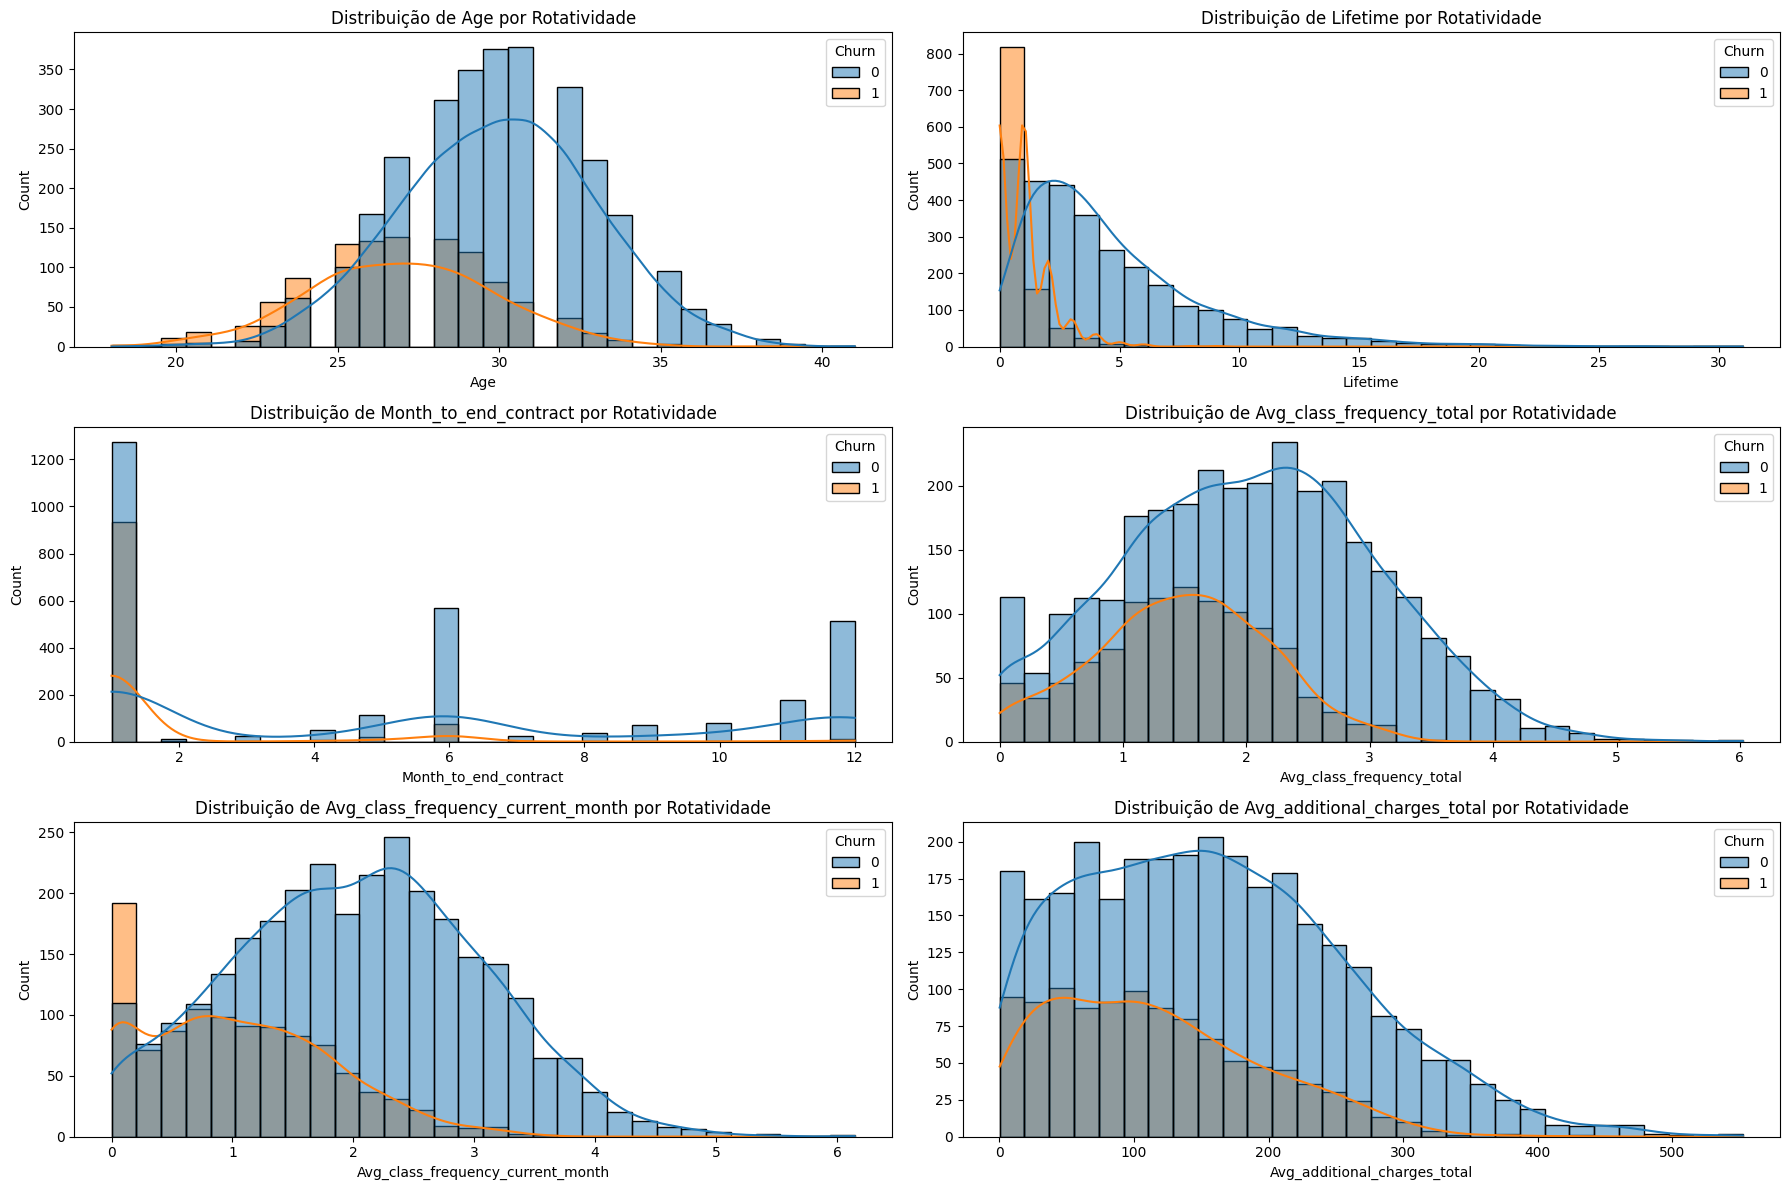

In [27]:
# Visualização: histogramas e distribuições
plt.figure(figsize=(18, 12))
numerical_features = ['Age', 'Lifetime', 'Month_to_end_contract', 'Avg_class_frequency_total', 
                      'Avg_class_frequency_current_month', 'Avg_additional_charges_total']

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, hue='Churn', kde=True, bins=30)
    plt.title(f'Distribuição de {col} por Rotatividade')

plt.tight_layout()
plt.show()


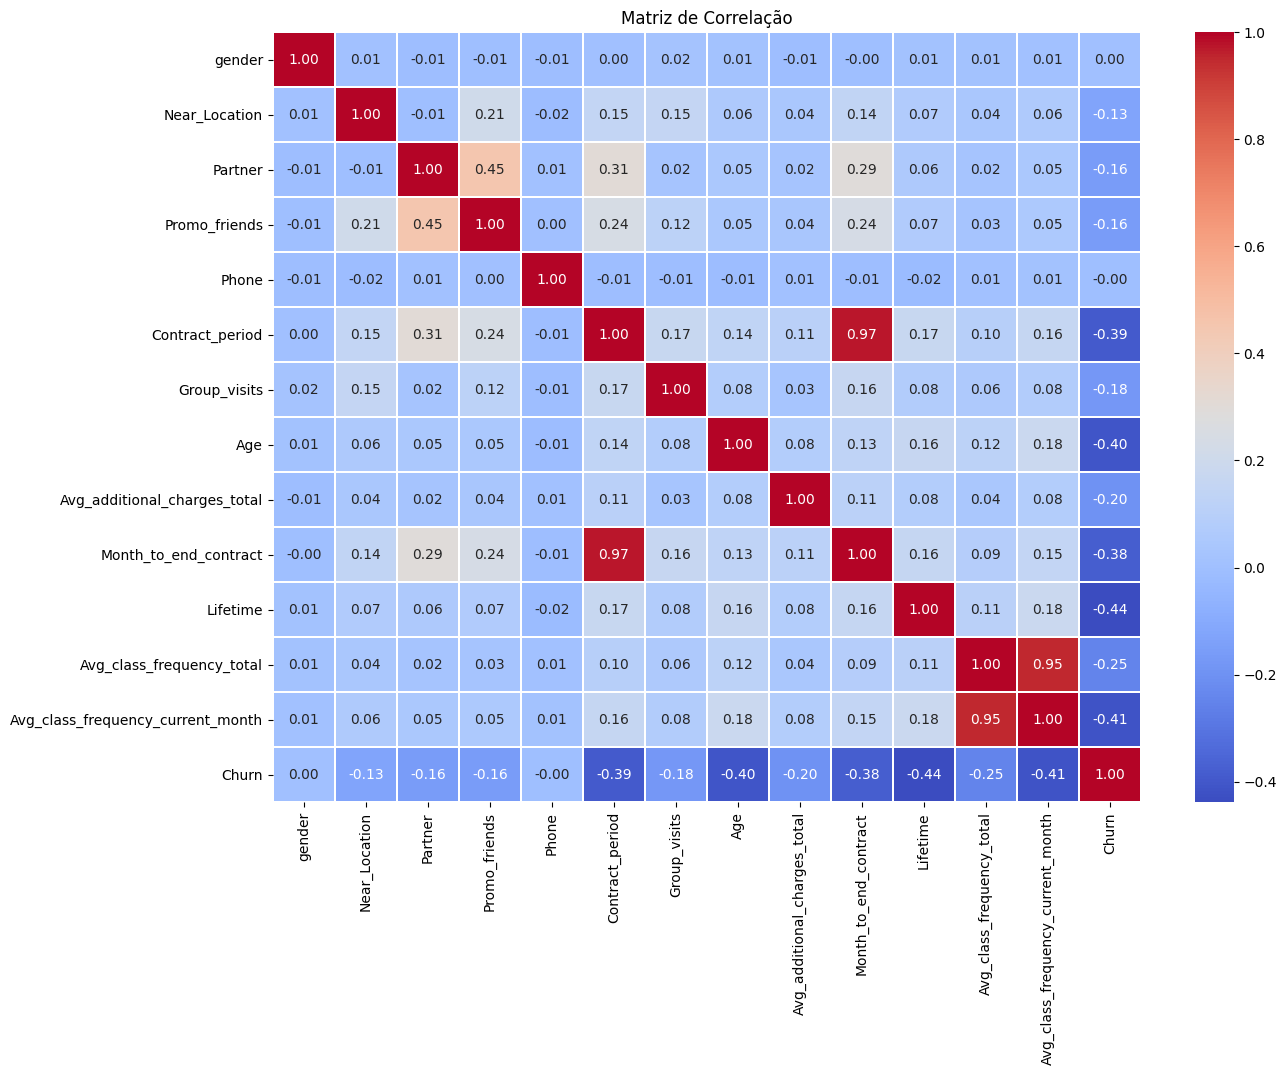

In [28]:
# Selecionar apenas colunas numéricas
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calcular a matriz de correlação
correlation_matrix = numerical_df.corr()

# Exibir a matriz de correlação com um heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Matriz de Correlação")
plt.show()



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Excelente trabalho checando a consistência dos dados.

Sempre importante para garantir uma análise robusta!
</div>


In [29]:
# Codificar variáveis categóricas
df_encoded = pd.get_dummies(df, drop_first=True)

# Separar variáveis independentes e alvo
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Dividir em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Escalonar os dados para regressão logística
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Regressão Logística
log_model = LogisticRegression(random_state=42)
log_model.fit(X_train_scaled, y_train)
log_preds = log_model.predict(X_val_scaled)

# Floresta Aleatória
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_val)

# Função de avaliação
def avaliar(y_true, y_pred):
    return {
        "Acurácia": accuracy_score(y_true, y_pred),
        "Precisão": precision_score(y_true, y_pred),
        "Sensibilidade (Recall)": recall_score(y_true, y_pred)
    }

# Avaliar os modelos
print("Regressão Logística:", avaliar(y_val, log_preds))
print("Floresta Aleatória:", avaliar(y_val, rf_preds))

Regressão Logística: {'Acurácia': 0.919, 'Precisão': 0.868, 'Sensibilidade (Recall)': 0.8188679245283019}
Floresta Aleatória: {'Acurácia': 0.919, 'Precisão': 0.8770491803278688, 'Sensibilidade (Recall)': 0.8075471698113208}


Conclusão:

Ambos os modelos tiveram a mesma acurácia, mas apresentam diferenças sutis em precisão e sensibilidade:
A Floresta Aleatória teve melhor precisão, ou seja, cometeu menos falsos positivos.
A Regressão Logística teve melhor recall, o que significa que identificou mais clientes propensos à rotatividade.
Se o objetivo é minimizar a perda de clientes identificando o maior número possível de churners, a Regressão Logística é ligeiramente preferível por seu melhor recall.
Mas se for mais importante evitar enganos ao classificar clientes como churners, a Floresta Aleatória é melhor por sua maior precisão.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Modelos solicitados foram treinados adequadamente e avaliados a partir das métricas presentes na ementa.
</div>


In [30]:
# Remover 'Churn' do conjunto de dados e transformar categorias em dummies
df_cluster = pd.get_dummies(df.drop('Churn', axis=1), drop_first=True)

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

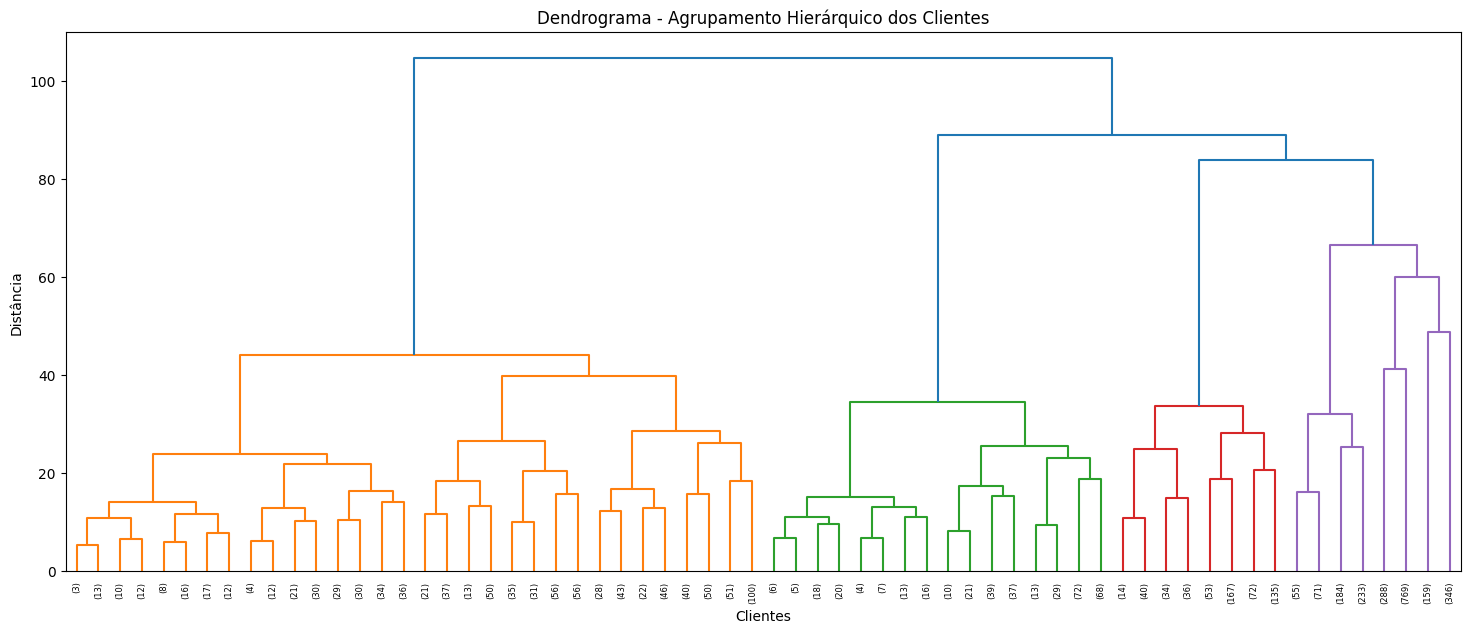

In [31]:
# Construir dendrograma
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(18, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Dendrograma - Agrupamento Hierárquico dos Clientes')
plt.xlabel('Clientes')
plt.ylabel('Distância')
plt.show()

In [32]:
# Treinar o modelo com 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [33]:
# Médias das características para cada cluster
cluster_means = df.groupby('cluster').mean(numeric_only=True)
print(cluster_means)

           gender  Near_Location   Partner  Promo_friends  Phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         Contract_period  Group_visits        Age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         Avg_additional_charges_total  Month_to_end_contract  Lifetime  \
cluster                                                                  
0  

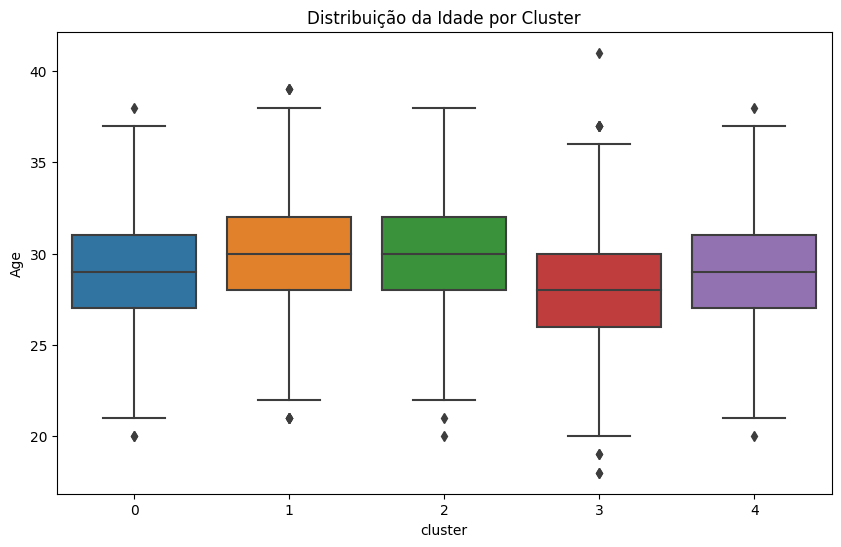

In [35]:
#Distribuição de idade por cluster
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='Age')
plt.title('Distribuição da Idade por Cluster')
plt.show()

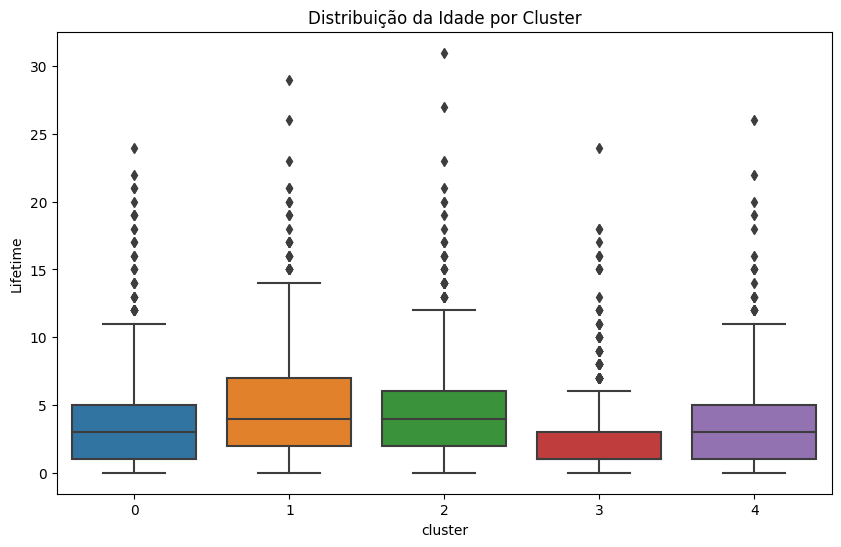

In [37]:
#Distribuição de idade por lifetime
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='Lifetime')
plt.title('Distribuição da Idade por Cluster')
plt.show()

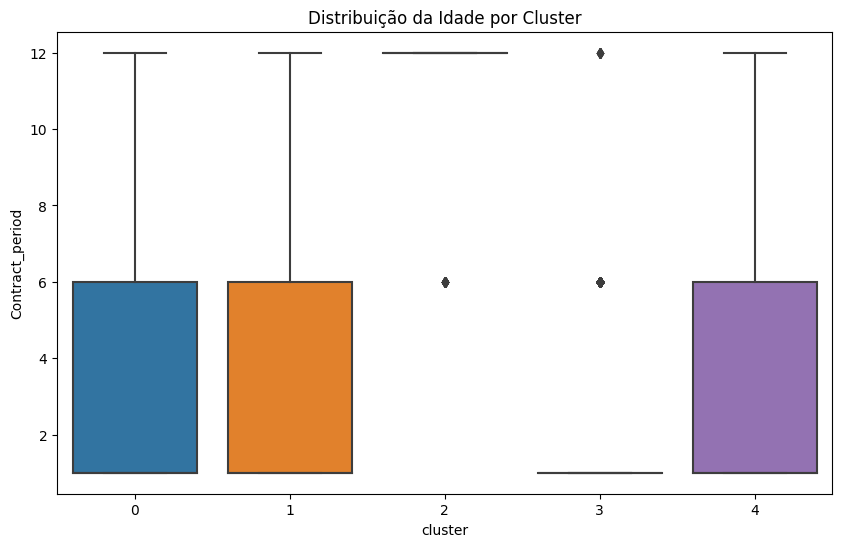

In [38]:
#Distribuição de idade por Contract_period
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cluster', y='Contract_period')
plt.title('Distribuição da Idade por Cluster')
plt.show()

In [39]:
# Taxa de churn (média da coluna 'Churn') por cluster
churn_by_cluster = df.groupby('cluster')['Churn'].mean()
print(churn_by_cluster)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: Churn, dtype: float64


Cluster 2 (2,2%) e Cluster 1 (9,0%) têm baixa taxa de churn e representam os clientes mais fiéis. Provavelmente têm contratos mais longos, frequência de uso alta e/ou vínculo forte com a academia.
Cluster 3 tem mais da metade dos clientes saindo (57%) — é o grupo com maior risco. Merece atenção urgente.
Clusters 0 e 4 também apresentam rotatividade significativa (em torno de 25–27%) e devem ser monitorados.



<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Processo de clusterização conduzido conforme solicitado e avaliações/conlusão coerentes com o resultado obtido e pedidos da lição.
</div>
